# Cluster mall customers to find interesting patterns using k-means in Python
------------
This work is part of a collection of practice sets called [Machine Learning Starter](https://github.com/jamiemorales/project-machine-learning-starter).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the machine learning lifecycle early on.
After completion, someone will have built intuition over the machine learning lifecycle. 

## Step 0: Understand the problem
What we're trying to do here is to find strong and interesting patterns or similarities from the mall's data about its customers.

## Step 1: Set-up and understand data
This step helps uncover issues that we will want to address in the next step and take into account when building and evaluating our model. We also want to find interesting relationships or patterns that we can possibly leverage in solving the problem we specified.

In [2]:
# Set-up libraries
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [3]:
# Read-in data
df = pd.read_csv('../00-Datasets/customers.csv')

In [8]:
# Look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Look at some records
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# Check for missing values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# Check for duplicate values
df.duplicated().sum()

0

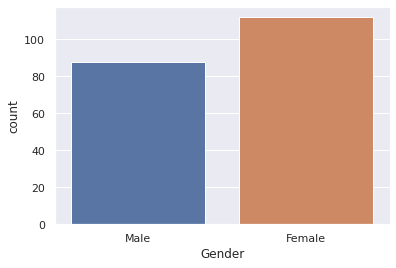

In [12]:
# Look at breakdown of Gender
df['Gender'].value_counts()
sns.countplot(df['Gender'])

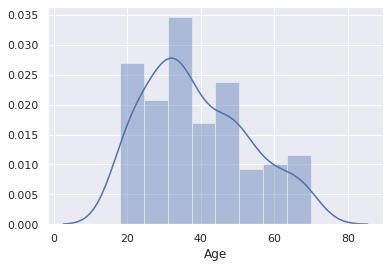

In [13]:
# Look at distribution of Age
sns.distplot(df['Age'])

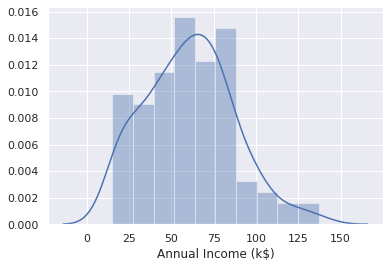

In [14]:
# Look at distribution of Annual Income
sns.distplot(df['Annual Income (k$)'])

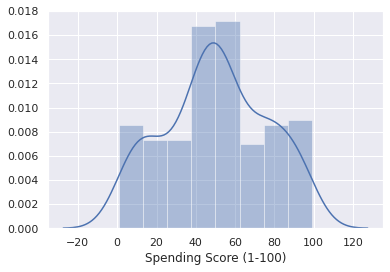

In [15]:
# Look at distribution of Spending
sns.distplot(df['Spending Score (1-100)'])

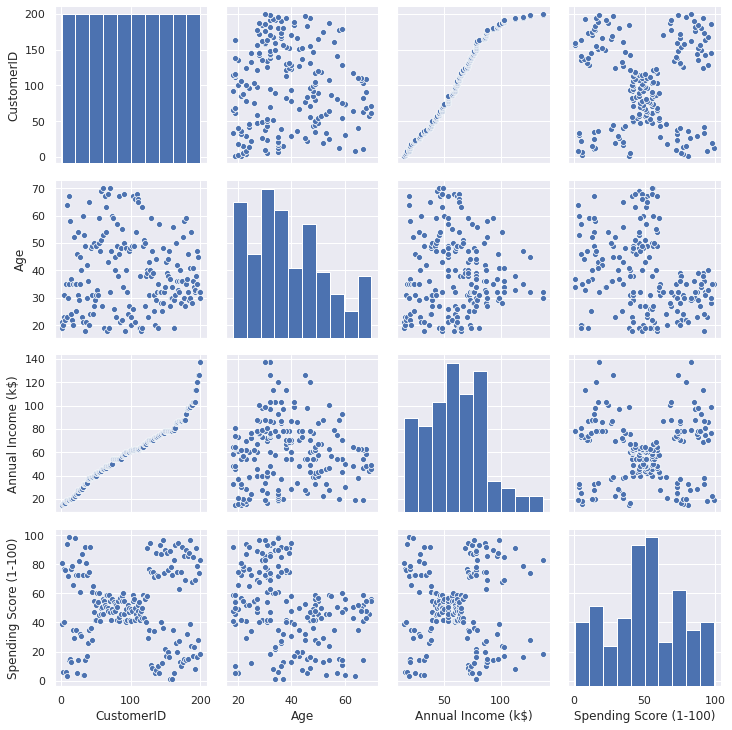

In [17]:
# Explore data visually with scatter plots
sns.pairplot(df)

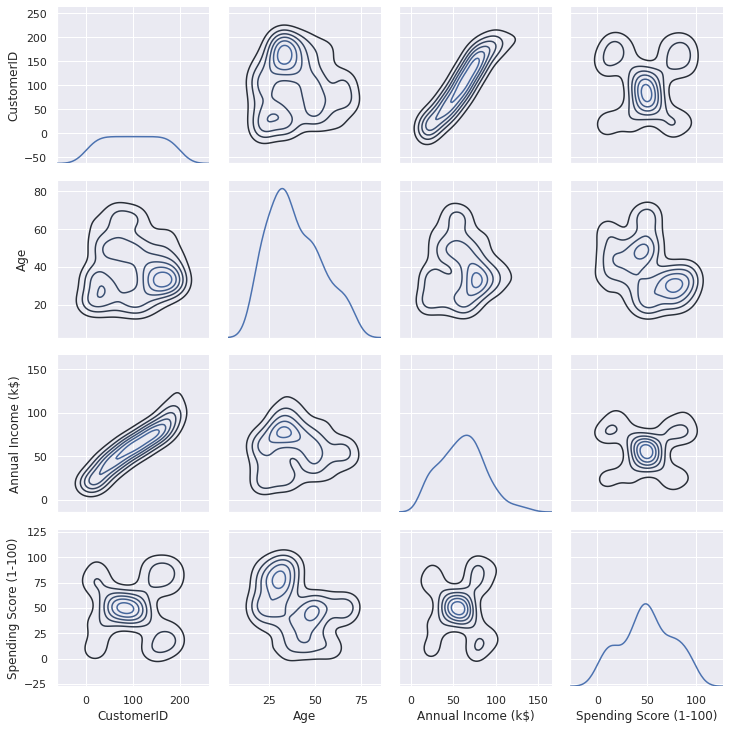

In [18]:
# Explore data visually with kernel density estimations
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

In [19]:
# Summarise
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Step 2: Preprocess data and understand some more
This step typically takes the most time in the cycle but for our purposes, most of the datasets chosen in this series are clean.

Real-world datasets are noisy and incomplete. The choices we make in this step to address data issues can impact downstream steps and the result itself. For example, it can be tricky to address missing data when we don't know why it's missing. Is it missing completely at random or not? It can also be tricky to address outliers if we do not understand the domain and problem context enough.

In [58]:
# Rename columns for easier handling
df = df.rename(columns={'Annual Income (k$)': 'Income',
                  'Spending Score (1-100)': 'Spending'
                  })
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [59]:
# Transform categorical features to numeric
le = LabelEncoder()
le.fit(df['Gender'].drop_duplicates())
df['Gender'] = le.transform(df['Gender'])

In [60]:
# Look at breakdown of feature Gender
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [67]:
# Get the features for input
X = df.drop('CustomerID', axis=1)
X.head()

,Gender,Age,Income,Spending
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Step 3: Model and evaluate

We need to create a number of models with different k values, measure the performance of each model, and use the k with the best performance in our final model. 

Where the ground truth is available, we compare the clusters generated to that of the ground truth.

In [82]:
# Build and fit models
wcss_scores = []
iterations = list(range(1,10))

for k in iterations:
    model = KMeans(n_clusters=k)
    model.fit(X)
    model.fit(X)
    wcss_scores.append(model.inertia_)

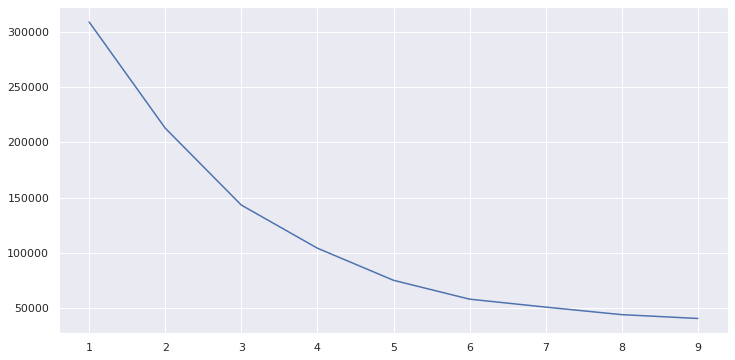

In [69]:
# Plot performances
plt.figure(figsize=(12,6))
sns.lineplot(iterations, wcss_scores)

There are dips at 2, 3, 4, and 5. Let's plot some features and see what's going on.

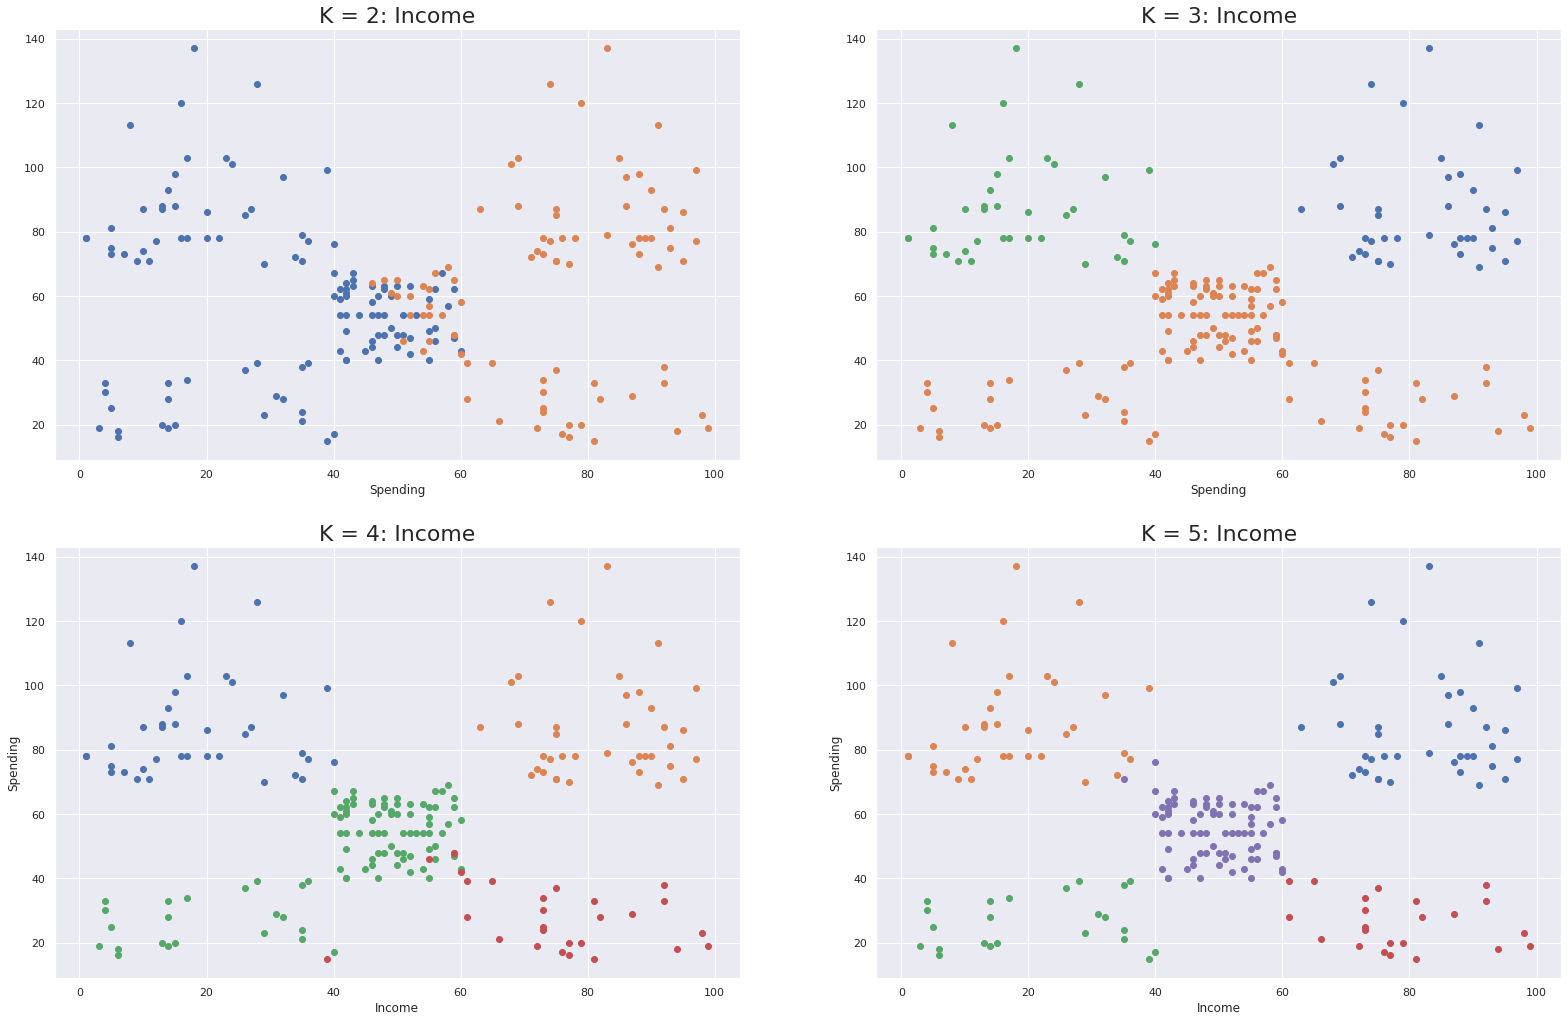

In [86]:
# Visualise the clusters, considering Income and Spending
plt.figure(figsize=(27,27))

plt.subplot(3,2,1)
plt.title('K = 2: Income',fontsize=22)
plt.xlabel('Income')
plt.xlabel('Spending')
model = KMeans(n_clusters=2)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])

plt.subplot(3,2,2)
plt.title('K = 3: Income',fontsize=22)
plt.xlabel('Income')
plt.xlabel('Spending')
model = KMeans(n_clusters=3)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])

plt.subplot(3, 2, 3)
plt.title('K = 4: Income', fontsize=22)
plt.xlabel('Income')
plt.ylabel('Spending')
model = KMeans(n_clusters=4)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Income[X.labels == 3])

plt.subplot(3, 2, 4)
plt.title('K = 5: Income', fontsize=22)
plt.xlabel('Income')
plt.ylabel('Spending')
model = KMeans(n_clusters=5)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Income[X.labels == 3])
plt.scatter(X.Spending[X.labels == 4], X.Income[X.labels == 4])

K=5 is curious as we can easily see five groupings in these plots. Let's take a closer look at k=5.

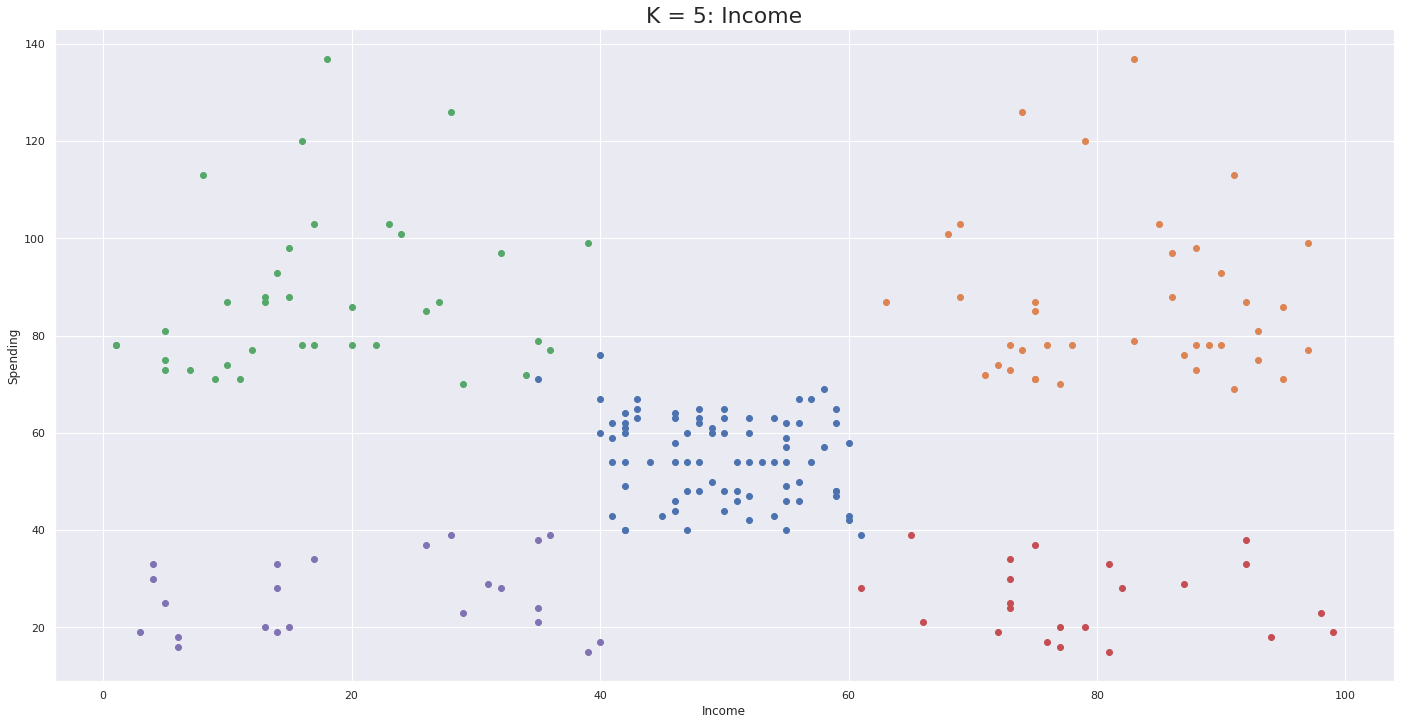

In [92]:
# Visualise most interesting clusters
plt.figure(figsize=(24,12))

plt.title('K = 5: Income', fontsize=22)
plt.xlabel('Income')
plt.ylabel('Spending')
model = KMeans(n_clusters=5)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Income[X.labels == 3])
plt.scatter(X.Spending[X.labels == 4], X.Income[X.labels == 4])

It turns out there are five interesting clusters based on a customer's annual income and spending score.

**Low-income, low-spenders**. The first cluster is comprised of customers who have low income and low spending.

**Low-income, high-spenders**. The second cluster is comprised of customers who have low income and high spending.

**Middle-income, middle-spenders**. The third cluster is comprised of customers who have middle income and middle spending.

**High-income, low-spenders**. The fourth cluster is comprised of customers who have high income and low spending.

**High-income, high-spenders**. The fifth cluster is comprised of customers who have high income and high spending.


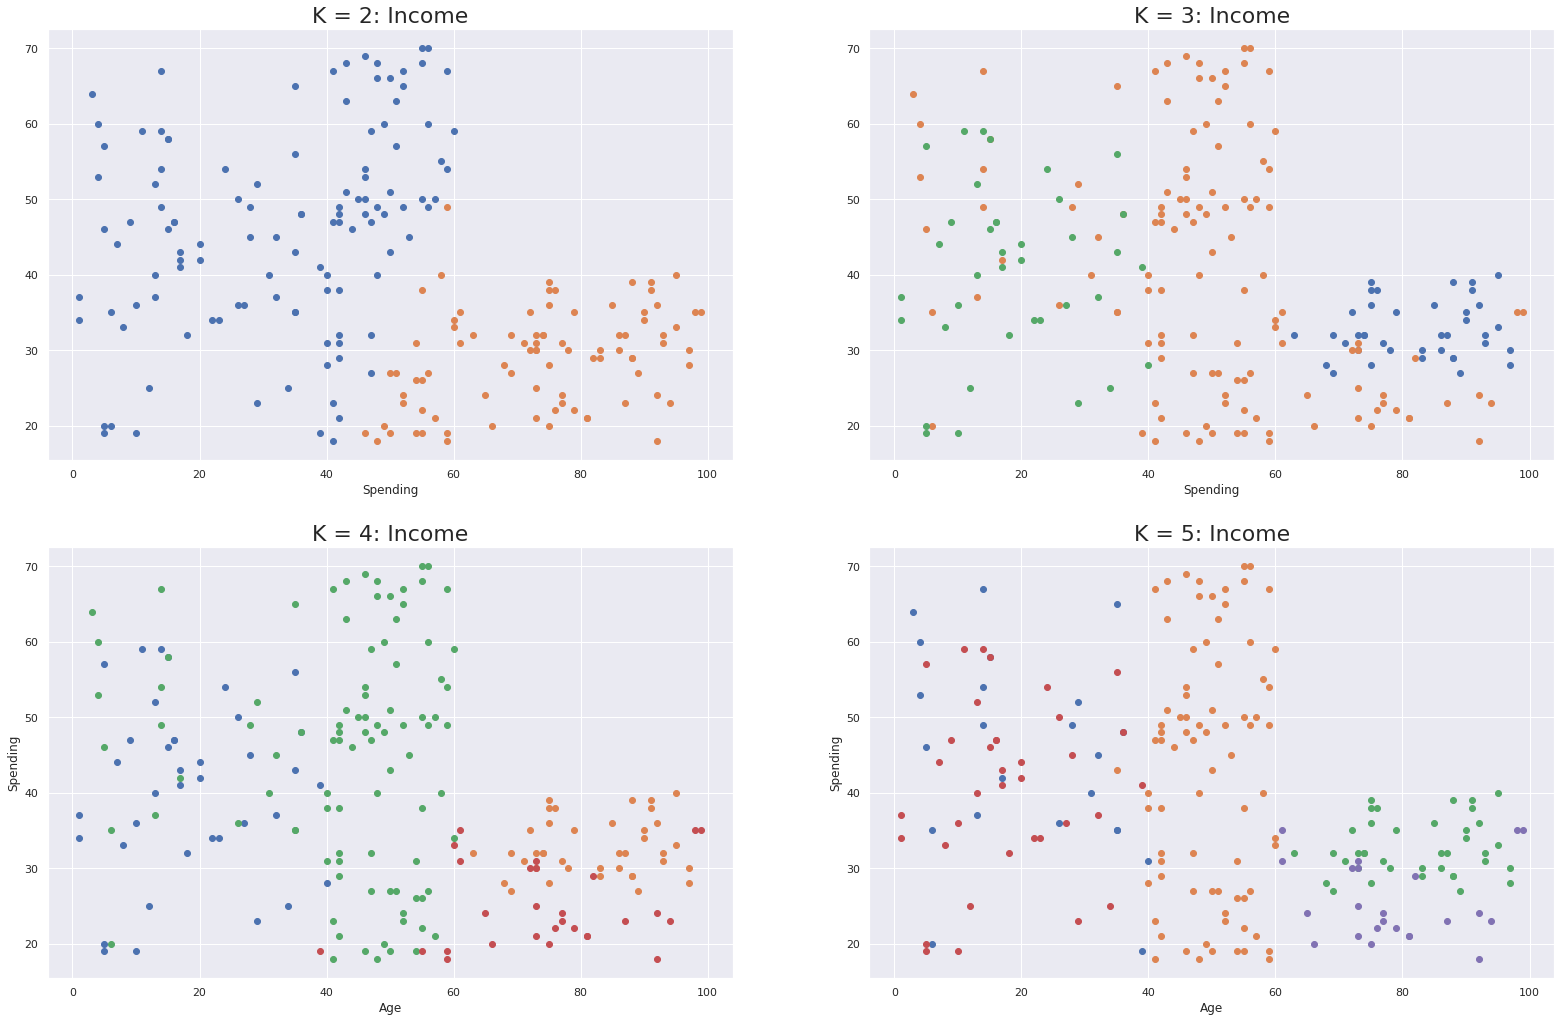

In [87]:
# Visualise the clusters, considering Age and Spending
plt.figure(figsize=(27,27))

plt.subplot(3,2,1)
plt.title('K = 2: Income',fontsize=22)
plt.xlabel('Age')
plt.xlabel('Spending')
model = KMeans(n_clusters=2)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])

plt.subplot(3,2,2)
plt.title('K = 3: Income',fontsize=22)
plt.xlabel('Age')
plt.xlabel('Spending')
model = KMeans(n_clusters=3)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Age[X.labels == 2])

plt.subplot(3, 2, 3)
plt.title('K = 4: Income', fontsize=22)
plt.xlabel('Age')
plt.ylabel('Spending')
model = KMeans(n_clusters=4)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Age[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Age[X.labels == 3])

plt.subplot(3, 2, 4)
plt.title('K = 5: Income', fontsize=22)
plt.xlabel('Age')
plt.ylabel('Spending')
model = KMeans(n_clusters=5)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Age[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Age[X.labels == 3])
plt.scatter(X.Spending[X.labels == 4], X.Age[X.labels == 4])

K=2 is curious as we can somewhat see 2 groupings in these plots. Let's take a closer look at k=2.

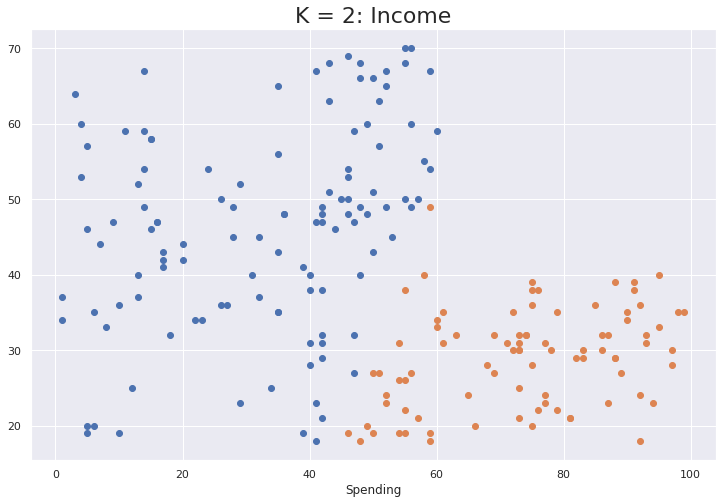

In [94]:
# Visualise interesting clusters
plt.figure(figsize=(27,27))

plt.subplot(3,2,1)
plt.title('K = 2: Income',fontsize=22)
plt.xlabel('Age')
plt.xlabel('Spending')
model = KMeans(n_clusters=2)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])

It turns out there are two interesting clusters based on a customer's age and spending score.

**Young to middle age high spenders**. One cluster is comprised of young to middle aged customers who have high spending.

**Young to middle age high spenders**. The other cluster is comprised of all other customers who have low to middle spending.

The young to middle age high spenders may be a lofty demographic to target.

## More

If you found this work interesting, you might like:

* Machine Learning Starter

* Deep Learning Starter

* Natural Language Processing Starter

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [datasets and sources](https://github.com/jamiemorales/project-machine-learning-starter/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/